In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
dataframe = pd.read_excel("fitur_quality.xlsx")
dataframe

,BMI,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,25.9,43.371765,136.627230,167.884118,147.336027,44.632768,0.041016,0.150391,1.573721,118.711852,152.390799,1.283703,0
1,25.9,43.209895,158.800617,186.541738,165.744091,44.696970,0.073242,0.178711,1.484478,131.904894,181.741153,1.377820,0
2,25.9,42.938592,136.909416,146.394741,125.156244,46.197719,0.040039,0.208984,1.972823,103.516465,163.532669,1.579774,0
3,24.5,40.071037,166.785007,200.025694,175.655510,49.234694,0.068359,0.156250,1.724128,141.439523,188.734579,1.334384,1
4,25.9,50.502192,305.105079,301.871241,270.587205,50.189394,0.060547,0.157227,1.449574,213.455200,374.974233,1.756688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,NaN,44.931388,589.049127,913.196598,532.391593,92.146597,0.088867,0.236328,0.502044,645.726979,522.580222,0.809290,0
105,NaN,59.490622,135.610427,64.607791,38.978432,47.916667,0.040039,0.272461,0.203282,45.676245,185.530246,4.061854,0
106,NaN,61.123084,127.522659,104.882885,75.627238,53.355705,0.044922,0.254883,2.447448,74.162843,164.121556,2.212989,0
107,NaN,64.437932,55.039434,52.842236,30.052714,38.993711,0.054688,0.219727,0.359295,37.364273,67.390739,1.803614,0


In [3]:
X = dataframe[["HF", "LF/HF", "HR", "SDSD", "SD2", "LF", "pNN50", "SDNN"]]
num_feature = len(X.columns)

y = dataframe["Label"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=64, input_shape=(num_feature,), activation="relu"),
        tf.keras.layers.Dense(units=512, activation="relu"),
        tf.keras.layers.Dense(units=256, activation="relu"),
        tf.keras.layers.Dense(units=128, activation="relu"),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

c:\Users\ASUS\anaconda3\envs\cuda-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


history = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.2)

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.1701 - loss: 12.8476 - val_accuracy: 0.2000 - val_loss: 9.0680
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1979 - loss: 9.7444 - val_accuracy: 0.2000 - val_loss: 7.4046
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1693 - loss: 8.7811 - val_accuracy: 0.2000 - val_loss: 5.7767
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1545 - loss: 7.3538 - val_accuracy: 0.2000 - val_loss: 4.2709
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2147 - loss: 4.9254 - val_accuracy: 0.6500 - val_loss: 2.9155
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5025 - loss: 3.1740 - val_accuracy: 0.6500 - val_loss: 1.7586
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6615 - loss: 2.3181 - val_accuracy: 0.8500 - val_loss: 0.9916
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6580 - loss: 1.3252 - val_accuracy: 0.8500 - 

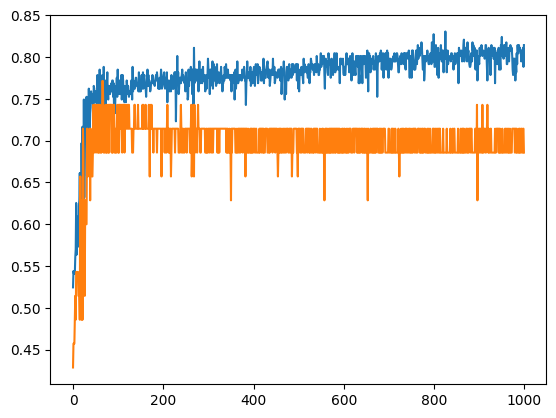

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print(f"Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7900 - loss: 0.4748
Loss: 0.49958109855651855
Accuracy: 0.7632


In [ ]:
X_test

,SDNN,SD2,RMSSD,SD1,SDSD,pNN50
65,76.288024,101.258976,52.642465,37.223823,37.733410,22.023810
278,44.239326,58.097926,29.975268,21.194897,18.660397,9.666667
118,110.097056,146.762739,73.006395,51.622786,55.790010,35.099338
101,74.531895,98.603486,51.567514,36.462148,40.568277,21.408451
379,141.728653,189.431300,91.206233,64.491186,79.664144,23.076923
86,61.651962,83.325102,35.916997,25.397143,21.710351,15.950920
122,118.135126,156.533289,82.317829,58.207288,67.920725,25.474255
293,60.231996,64.470091,78.694647,55.645446,71.410919,12.987013
70,55.980765,75.399880,28.986631,20.488618,18.104162,6.514658
267,45.119479,54.182649,47.297682,33.444300,31.548476,20.875421


In [ ]:
prediction = model.predict(X_test)
predicted_labels = (prediction > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Text(113.9222222222222, 0.5, 'predicted class')

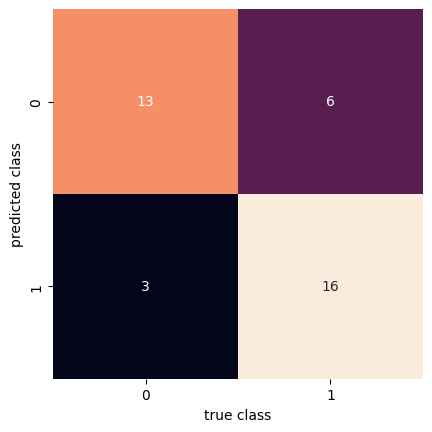

In [ ]:
conmat = confusion_matrix(y_test, predicted_labels)
sns.heatmap(conmat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true class")
plt.ylabel("predicted class")